# Linear Regression with two features 

In [1]:
#predict sales using MRP and store establishment

In [16]:
# importing basic libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
# importing test and train file
train=pd.read_csv("Big_mart_sales_train.csv")
test=pd.read_csv("Big_mart_sales_test.csv")


In [18]:
#importing linear regression from sklearn
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [19]:
#splitting the train file into training and validation 
# X = take only reqired columns
X=train.loc[:,['Outlet_Establishment_Year','Item_MRP']]  
x_train,x_validate,y_train,y_validate=train_test_split(X,train.Item_Outlet_Sales)

In [20]:
#training the model
lreg.fit(x_train,y_train)
#predicting on validation
pred=lreg.predict(x_validate)

In [21]:
#calculating mse(mean squared error):
mse=np.mean((pred-y_validate)**2)
mse

1944165.1281097096

In [22]:
#calculating coefficient :
coeff=pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate']=pd.Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.240684
1,Item_MRP,15.443271


It shows MRP has high coefficient means that weight of MRP is more in predicting sales i.e high MRP , high Sales.

In [23]:
#calculate r-square ":
lreg.score(x_validate,y_validate)

0.33669977533740514

 R² is 32%, meaning, only 32% of variance in sales is explained by year of establishment and MRP. 
 In other words, if you know year of establishment and the MRP, you’ll have 32% information to make an accurate prediction about its sales.

# Linear Regression with more than two variables

In [24]:
#predict sales of big mart using Outlet_Establishment_Year','Item_MRP','Item_Weight

In [30]:
X=train.loc[:,["Outlet_Establishment_Year",'Item_MRP',"Item_Weight"]]
x_train,x_validate,y_train,y_validate=train_test_split(X,train.Item_Outlet_Sales)

In [31]:
#Imputing missing values with mean
train["Item_Weight"].fillna((train["Item_Weight"].mean()),inplace=True)

In [32]:
train["Item_Weight"].isnull().sum()    #checking count of msising val

0

In [34]:
# training the model 
lreg.fit(x_train,y_train)  
#splitting into training and cv for cross validation 
x_train, x_validate, y_train, y_validate = train_test_split(X,train.Item_Outlet_Sales)  
## training the model 
lreg.fit(x_train,y_train) 
# predicting on cv 
pred = lreg.predict(x_validate) 

In [35]:
# calculating mse 
mse = np.mean((pred - y_validate)**2) 
mse 

2003291.3831643416

In [40]:
##calculating coefficient :
coeff=pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate']=pd.Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-10.271448
1,Item_MRP,15.605307
2,Item_Weight,1.634348


In [41]:
# calculating r-square
lreg.score(x_validate,y_validate) 

0.3171115803142126

# Linear Regression with all features

In [43]:
#Data pre-processing steps for regression model

# imputing missing values 
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Size'].fillna('Small',inplace=True)  

# creating dummy variables to convert categorical into numeric values 
mylist = list(train.select_dtypes(include=['object']).columns) 
dummies = pd.get_dummies(train[mylist], prefix= mylist) 
train.drop(mylist, axis=1, inplace = True)  
X = pd.concat([train,dummies], axis =1 )

In [44]:
#Building the model
import matplotlib.pyplot as plt 
%matplotlib inline 

X = train.drop('Item_Outlet_Sales',1) 
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales, test_size =0.3) 

# training a linear regression model on train 
lreg.fit(x_train,y_train)  

# predicting on cv 
pred_cv = lreg.predict(x_cv) 

# calculating mse 
mse = np.mean((pred_cv - y_cv)**2) 
mse 

1962843.832918619

In [46]:
# evaluation using r-square 
lreg.score(x_cv,y_cv) 

0.3484769974381505

we can see that there is an increase in r-square and mse.which means we are now more close to actual prediction.

# Regularization

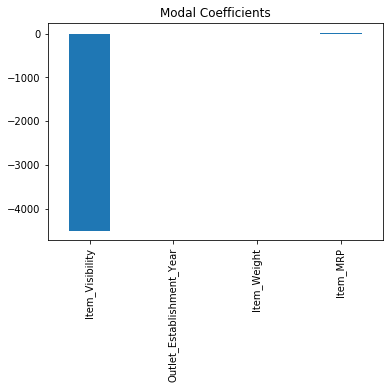

In [48]:
predictors = x_train.columns 
coef = pd.Series(lreg.coef_,predictors).sort_values() 
coef.plot(kind='bar', title='Modal Coefficients')